In [217]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xgboost/XGBOOST_Output.csv
/kaggle/input/forestcover/train.csv
/kaggle/input/forestcover/test.csv
/kaggle/input/forestcover/sample_submission.csv
/kaggle/input/weightedoutput/LGBM_Output.csv
/kaggle/input/weightedoutput/XGBOOST_Output.csv


# This is a MultiClass Classification Problem

In [218]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
#import the required Modules
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import seaborn as sns
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [219]:
filename1 = "/kaggle/input/forestcover/train.csv"
filename2 = "/kaggle/input/forestcover/test.csv"
filename3 = "/kaggle/input/forestcover/sample_submission.csv"
train= pd.read_csv(filename1,sep=",",index_col=None,thousands=",")
test= pd.read_csv(filename2,sep=",",index_col=None,thousands=",")
final_submission = pd.read_csv(filename3)

In [220]:
print('The Shape of Train dataset is: ',train.shape)
print('The Shape of Test dataset is: ',test.shape)

The Shape of Train dataset is:  (29050, 55)
The Shape of Test dataset is:  (551962, 54)


In [221]:
final_submission.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0
0,0.0,0.0,0.0,0.0,0.9,0.0,0.1
1,0.5,0.0,0.0,0.0,0.0,0.0,0.5
2,0.0,0.0,0.0,0.0,0.8,0.2,0.0
3,0.0,0.0,0.0,0.0,0.8,0.0,0.2
4,0.0,0.0,0.1,0.0,0.7,0.1,0.2


In [222]:
train.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2982,186,14,323,66,5351,222,249,158,1530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,2929,243,15,335,33,5778,189,251,198,6429,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
2,3051,162,12,1224,253,3182,231,243,142,1167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
3,3090,345,17,362,92,2460,184,211,164,2384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,3023,4,9,234,51,4994,208,222,151,3813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7


In [223]:
test.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2798,151,12,60,-5,3373,236,240,132,6083,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3582,96,34,420,80,2579,250,170,19,3771,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2619,171,12,270,-52,2764,228,245,147,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2897,155,5,210,14,2437,226,240,149,2455,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2845,32,12,309,47,2778,217,213,129,42,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
train.Cover_Type.value_counts(dropna=False)

5    14165
7    10592
6     1788
1     1025
3      868
2      475
4      137
Name: Cover_Type, dtype: int64

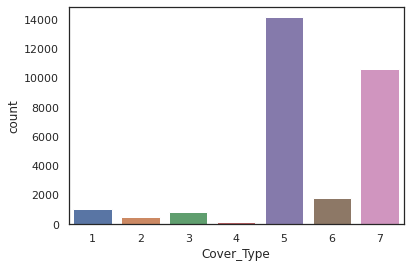

In [225]:
sns.countplot(train.Cover_Type)

In [226]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [227]:
df.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,train_or_test
0,2982,186,14,323,66,5351,222,249,158,1530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5.0,train
1,2929,243,15,335,33,5778,189,251,198,6429,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7.0,train
2,3051,162,12,1224,253,3182,231,243,142,1167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.0,train
3,3090,345,17,362,92,2460,184,211,164,2384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,train
4,3023,4,9,234,51,4994,208,222,151,3813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7.0,train


In [228]:
df.isnull().sum()

Elevation(meters)                                  0
Aspect(degrees)                                    0
Slope(degrees)                                     0
Horizontal_Distance_To_Hydrology(meters)           0
Vertical_Distance_To_Hydrology(meters)             0
Horizontal_Distance_To_Roadways(meters)            0
Hillshade_9am                                      0
Hillshade_Noon                                     0
Hillshade_3pm                                      0
Horizontal_Distance_To_Fire_Points(meters)         0
Wilderness_Area_1                                  0
Wilderness_Area_2                                  0
Wilderness_Area_3                                  0
Wilderness_Area_4                                  0
Soil_Type_1                                        0
Soil_Type_2                                        0
Soil_Type_3                                        0
Soil_Type_4                                        0
Soil_Type_5                                   

#### Thus we have no missing data
## Note : The variable Soil_Type and Wilderness area are One Hot encoded we need to convert them back for Feature Engineering

In [229]:
df['Soil_Type'] = (df.iloc[:,14:54]==1).idxmax(1)
df['Wilderness_Area']= (df.iloc[:,10:13]==1).idxmax(1)

In [230]:
df.drop(df.columns[10:54],axis=1,inplace=True)

In [231]:
df.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Cover_Type,train_or_test,Soil_Type,Wilderness_Area
0,2982,186,14,323,66,5351,222,249,158,1530,5.0,train,Soil_Type_30,Wilderness_Area_1
1,2929,243,15,335,33,5778,189,251,198,6429,7.0,train,Soil_Type_29,Wilderness_Area_1
2,3051,162,12,1224,253,3182,231,243,142,1167,5.0,train,Soil_Type_34,Wilderness_Area_3
3,3090,345,17,362,92,2460,184,211,164,2384,7.0,train,Soil_Type_24,Wilderness_Area_3
4,3023,4,9,234,51,4994,208,222,151,3813,7.0,train,Soil_Type_29,Wilderness_Area_1


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581012 entries, 0 to 551961
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Elevation(meters)                           581012 non-null  int64  
 1   Aspect(degrees)                             581012 non-null  int64  
 2   Slope(degrees)                              581012 non-null  int64  
 3   Horizontal_Distance_To_Hydrology(meters)    581012 non-null  int64  
 4   Vertical_Distance_To_Hydrology(meters)      581012 non-null  int64  
 5   Horizontal_Distance_To_Roadways(meters)     581012 non-null  int64  
 6   Hillshade_9am                               581012 non-null  int64  
 7   Hillshade_Noon                              581012 non-null  int64  
 8   Hillshade_3pm                               581012 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points(meters)  581012 non-null  int64  
 

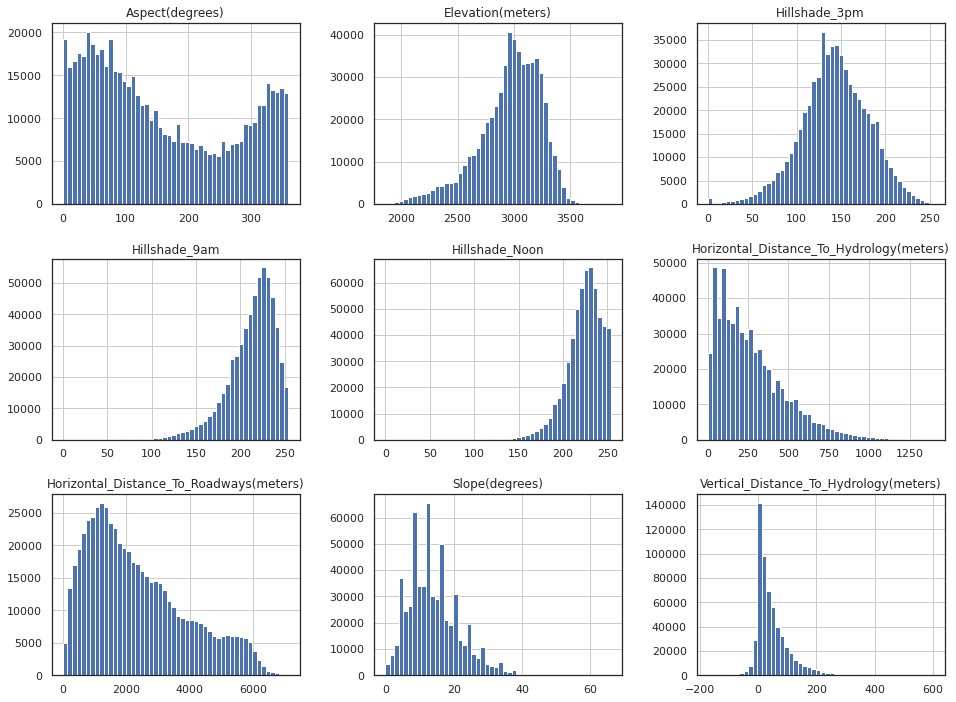

In [233]:
df.iloc[:,:9].hist(figsize=(16,12),bins=50)
plt.show()

# Summary Statistics

In [234]:
df.describe()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,29050.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,5.536110
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.438261
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,5.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,5.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,7.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000


In [235]:
df.Cover_Type.value_counts(dropna=False)

NaN    551962
5.0     14165
7.0     10592
6.0      1788
1.0      1025
3.0       868
2.0       475
4.0       137
Name: Cover_Type, dtype: int64

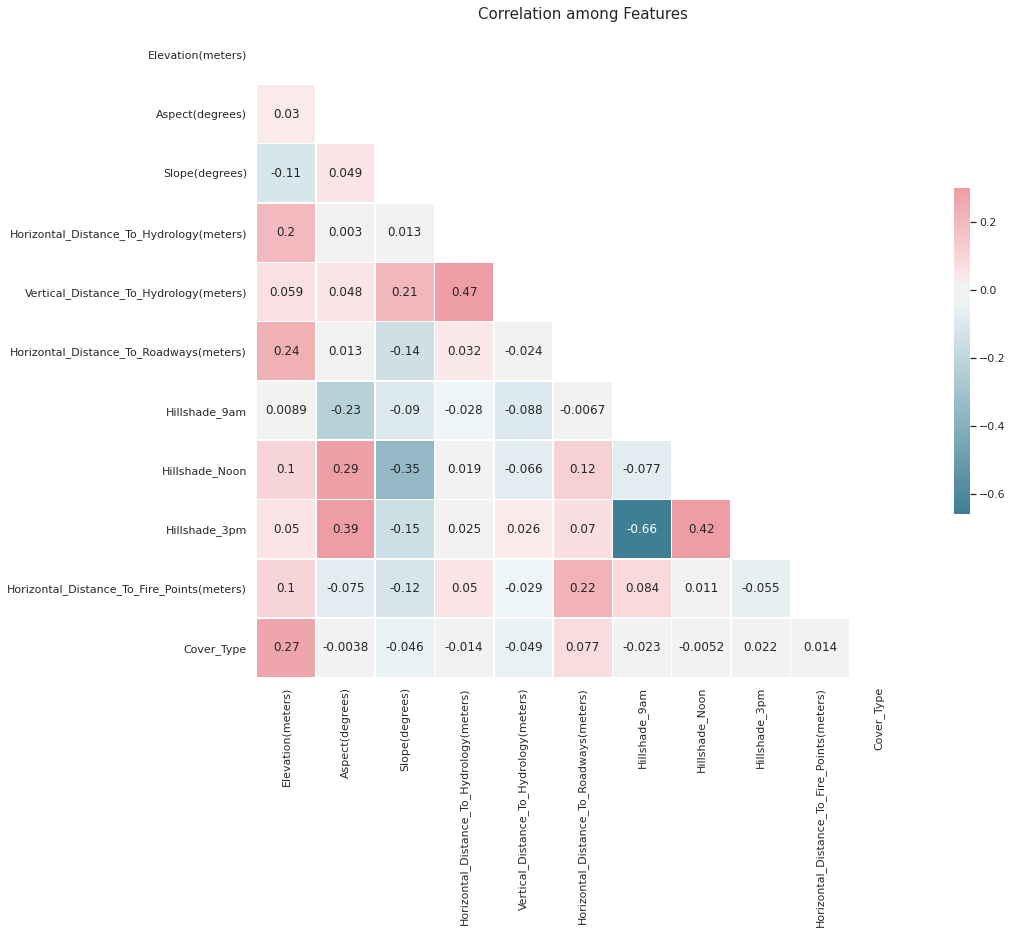

In [236]:
sns.set(style="white")
num_cols = [i for i in df.select_dtypes(['int64','float64'])]
correlation = df[num_cols].corr(method ='kendall')
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True);
plt.title("Correlation among Features",fontsize=15)
plt.show()

# Inferences from Correlation Plot
### 1) No strong correlation exists apart from Hillshade 9am and 3pm variables

# Starting with Elevation

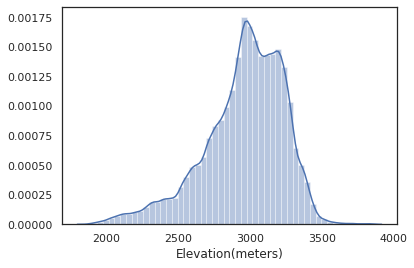

In [237]:
sns.distplot(df['Elevation(meters)'])

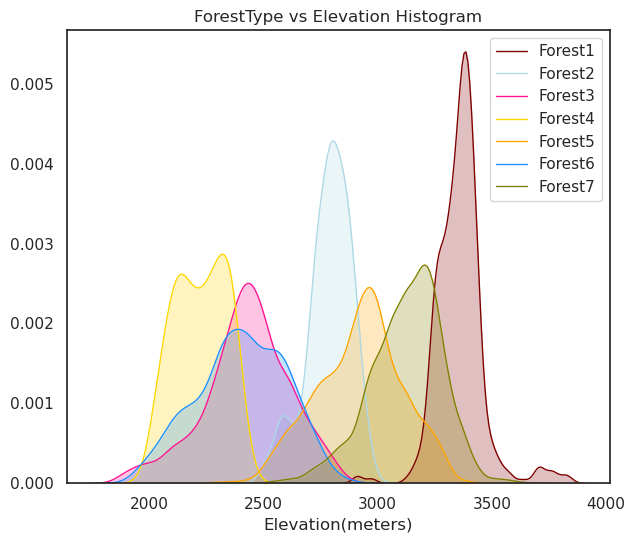

In [238]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.Cover_Type==1.0, "Elevation(meters)"] , color="maroon", label="Forest1",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==2.0, "Elevation(meters)"] , color="lightblue", label="Forest2",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==3.0, "Elevation(meters)"] , color="deeppink", label="Forest3",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==4.0, "Elevation(meters)"] , color="gold", label="Forest4",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==5.0, "Elevation(meters)"] , color="orange", label="Forest5",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==6.0, "Elevation(meters)"] , color="dodgerblue", label="Forest6",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==7.0, "Elevation(meters)"] , color="olive", label="Forest7",hist=False,kde_kws={'shade': True, 'linewidth':1})


plt.title('ForestType vs Elevation Histogram')
plt.legend();

# Working on Aspect

In [239]:
def r(x):
    if x+180>360:
        return x-180
    else:
        return x+180

df['Aspect_new'] = df['Aspect(degrees)'].map(r)

In [240]:
df['Aspect_new'].head()

0      6
1     63
2    342
3    165
4    184
Name: Aspect_new, dtype: int64

In [241]:
df['Aspect(degrees)'].head()

0    186
1    243
2    162
3    345
4      4
Name: Aspect(degrees), dtype: int64

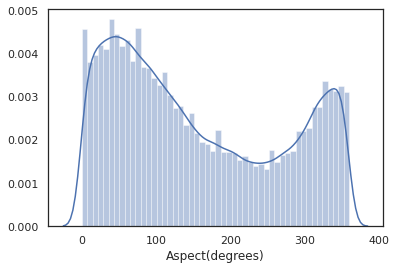

In [242]:
sns.distplot(df['Aspect(degrees)'])

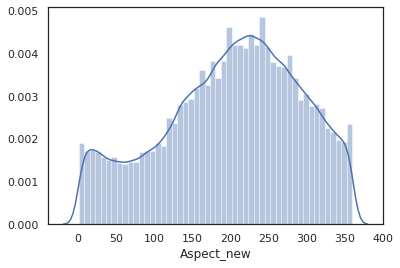

In [243]:
sns.distplot(df['Aspect_new'])

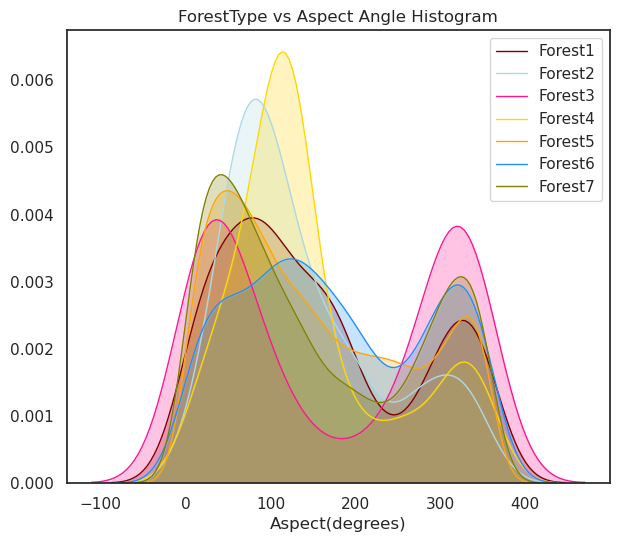

In [244]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.Cover_Type==1.0, "Aspect(degrees)"] , color="maroon", label="Forest1",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==2.0, "Aspect(degrees)"] , color="lightblue", label="Forest2",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==3.0, "Aspect(degrees)"] , color="deeppink", label="Forest3",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==4.0, "Aspect(degrees)"] , color="gold", label="Forest4",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==5.0, "Aspect(degrees)"] , color="orange", label="Forest5",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==6.0, "Aspect(degrees)"] , color="dodgerblue", label="Forest6",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==7.0, "Aspect(degrees)"] , color="olive", label="Forest7",hist=False,kde_kws={'shade': True, 'linewidth':1})


plt.title('ForestType vs Aspect Angle Histogram')
plt.legend();

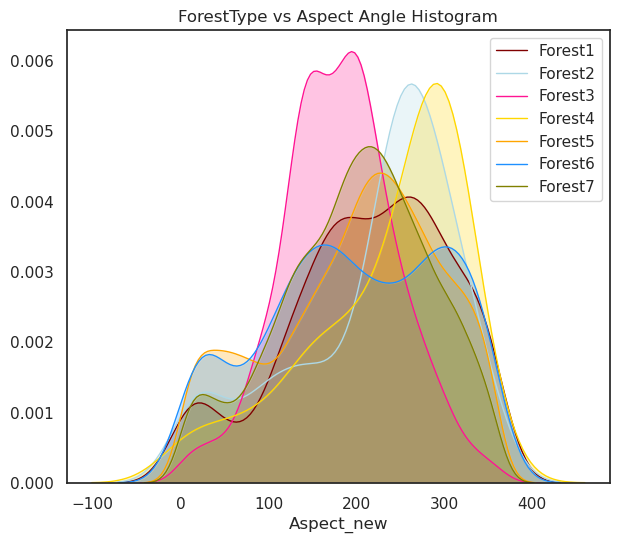

In [245]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.Cover_Type==1.0, "Aspect_new"] , color="maroon", label="Forest1",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==2.0, "Aspect_new"] , color="lightblue", label="Forest2",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==3.0, "Aspect_new"] , color="deeppink", label="Forest3",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==4.0, "Aspect_new"] , color="gold", label="Forest4",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==5.0, "Aspect_new"] , color="orange", label="Forest5",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==6.0, "Aspect_new"] , color="dodgerblue", label="Forest6",hist=False,kde_kws={'shade': True, 'linewidth':1})
sns.distplot( df.loc[df.Cover_Type==7.0, "Aspect_new"] , color="olive", label="Forest7",hist=False,kde_kws={'shade': True, 'linewidth':1})


plt.title('ForestType vs Aspect Angle Histogram')
plt.legend();

In [246]:
category = pd.cut(df['Aspect(degrees)'],bins=4,labels=['Q1','Q2','Q3','Q4'])
df.insert(5,'AsceptD_Group',category)
df.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),AsceptD_Group,Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Cover_Type,train_or_test,Soil_Type,Wilderness_Area,Aspect_new
0,2982,186,14,323,66,Q3,5351,222,249,158,1530,5.0,train,Soil_Type_30,Wilderness_Area_1,6
1,2929,243,15,335,33,Q3,5778,189,251,198,6429,7.0,train,Soil_Type_29,Wilderness_Area_1,63
2,3051,162,12,1224,253,Q2,3182,231,243,142,1167,5.0,train,Soil_Type_34,Wilderness_Area_3,342
3,3090,345,17,362,92,Q4,2460,184,211,164,2384,7.0,train,Soil_Type_24,Wilderness_Area_3,165
4,3023,4,9,234,51,Q1,4994,208,222,151,3813,7.0,train,Soil_Type_29,Wilderness_Area_1,184


In [247]:
#df.drop(['AsceptD_Group'],axis=1,inplace=True)
df.isnull().sum()

Elevation(meters)                                  0
Aspect(degrees)                                    0
Slope(degrees)                                     0
Horizontal_Distance_To_Hydrology(meters)           0
Vertical_Distance_To_Hydrology(meters)             0
AsceptD_Group                                      0
Horizontal_Distance_To_Roadways(meters)            0
Hillshade_9am                                      0
Hillshade_Noon                                     0
Hillshade_3pm                                      0
Horizontal_Distance_To_Fire_Points(meters)         0
Cover_Type                                    551962
train_or_test                                      0
Soil_Type                                          0
Wilderness_Area                                    0
Aspect_new                                         0
dtype: int64

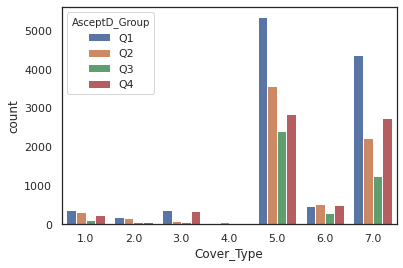

In [248]:
sns.countplot(df['Cover_Type'],hue =df['AsceptD_Group'])

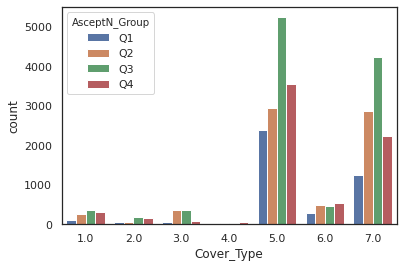

In [249]:
category1 = pd.cut(df['Aspect_new'],bins=4,labels=['Q1','Q2','Q3','Q4'])
df.insert(5,'AsceptN_Group',category1)
sns.countplot(df['Cover_Type'],hue =df['AsceptN_Group'])

# Looking into distribution for other variables

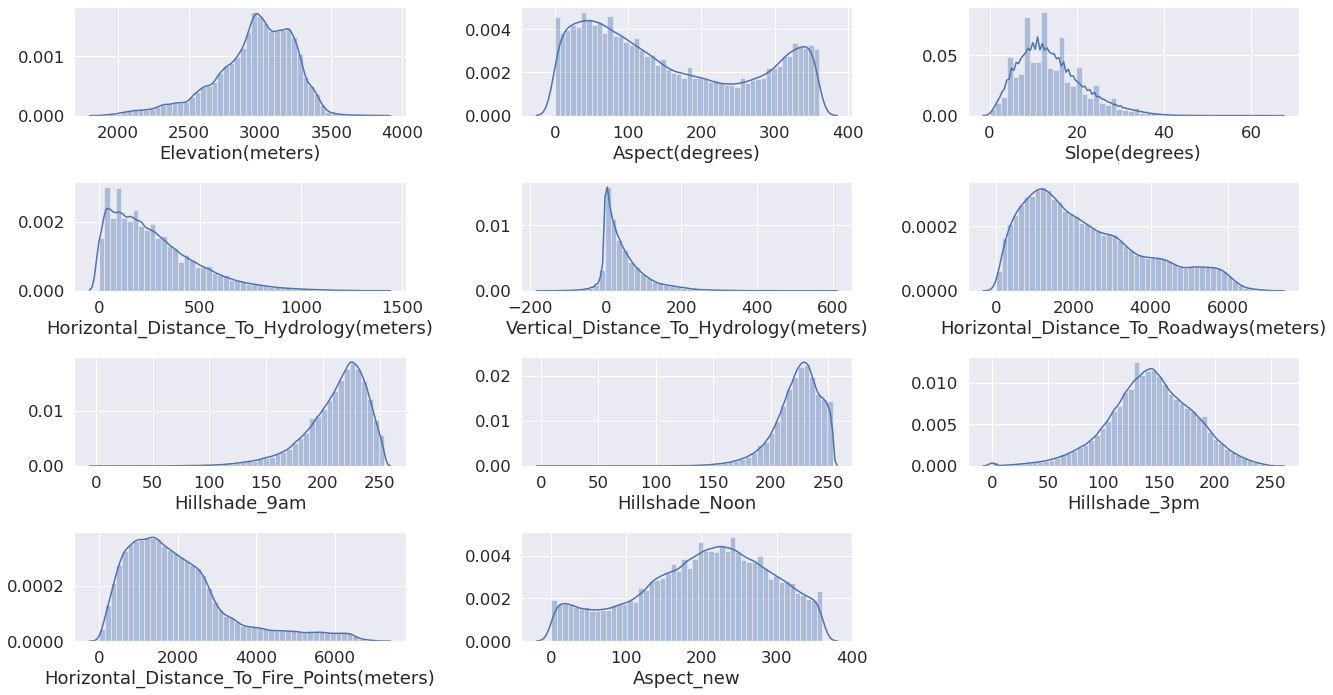

In [250]:
num_cols1 = [i for i in df.select_dtypes(['int64'])]
sns.set(rc={'figure.figsize':(19,10)},font_scale=1.5)
i = 1
for column in df[num_cols1]:
    plt.subplot(4,3,i)
    sns.distplot(df[column])
    i = i + 1
                  
plt.tight_layout()
plt.show()

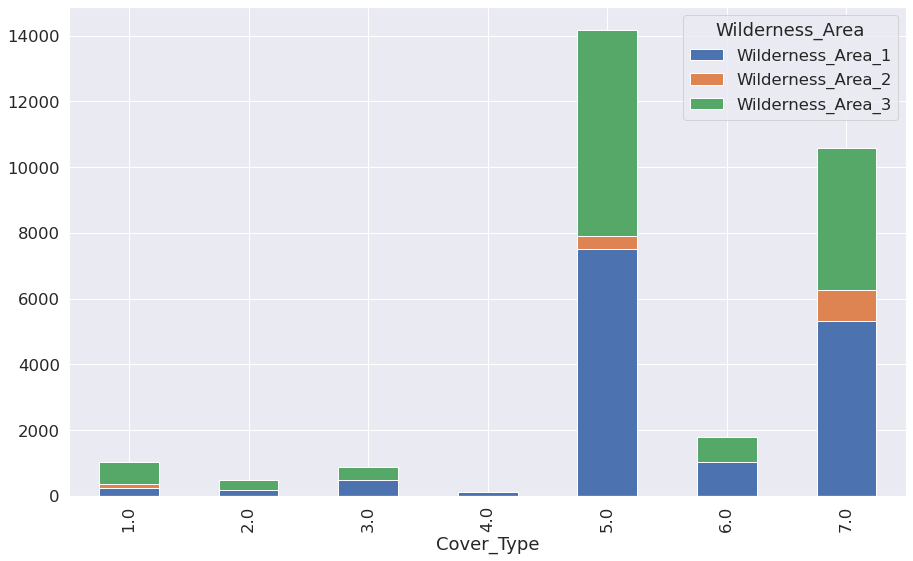

In [251]:
sns.set(rc={'figure.figsize':(15,9)},font_scale=1.5)
pd.crosstab(df['Cover_Type'], df['Wilderness_Area']).plot(kind='bar', stacked=True)

In [252]:
df.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)', 'AsceptN_Group',
       'AsceptD_Group', 'Horizontal_Distance_To_Roadways(meters)',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Cover_Type',
       'train_or_test', 'Soil_Type', 'Wilderness_Area', 'Aspect_new'],
      dtype='object')

# Feature Engineering

In [253]:
df['Elevation(meters)'] = np.log(df['Elevation(meters)'])
df['Elevation(meters)'].head()

0    8.000349
1    7.982416
2    8.023225
3    8.035926
4    8.014005
Name: Elevation(meters), dtype: float64

In [254]:
df['Highwater'] = df['Vertical_Distance_To_Hydrology(meters)'] < 0
df['Highwater'].value_counts()

False    525869
True      55143
Name: Highwater, dtype: int64

#### let calculate the Euclidean distances

In [255]:
df['Euclidean_Hydrology'] = (df['Horizontal_Distance_To_Hydrology(meters)']**2+df['Vertical_Distance_To_Hydrology(meters)']**2)**0.5

In [256]:
df['Hydro_Fire_Sum'] = abs(df['Horizontal_Distance_To_Hydrology(meters)']+df['Horizontal_Distance_To_Fire_Points(meters)'])
df['Hydro_Fire_Diff'] = abs(df['Horizontal_Distance_To_Hydrology(meters)']-df['Horizontal_Distance_To_Fire_Points(meters)'])
df['Hydro_Road_Sum'] = abs(df['Horizontal_Distance_To_Hydrology(meters)']+df['Horizontal_Distance_To_Roadways(meters)'])
df['Hydro_Road_Diff'] = abs(df['Horizontal_Distance_To_Hydrology(meters)']-df['Horizontal_Distance_To_Roadways(meters)'])
df['Fire_Road_Sum'] = abs(df['Horizontal_Distance_To_Fire_Points(meters)']+df['Horizontal_Distance_To_Roadways(meters)'])
df['Fire_Road_Diff'] = abs(df['Horizontal_Distance_To_Fire_Points(meters)']-df['Horizontal_Distance_To_Roadways(meters)'])

In [257]:
#'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'
df['H9_squarred'] = df['Hillshade_9am']**2
df['Noon12_squarred'] = df['Hillshade_Noon']**2
df['T3_squareed'] = df['Hillshade_3pm']**2

In [258]:
df['Shade_mean'] = df.iloc[:,8:10].mean(axis=1)
df['Shade_mean'].head()

0    235.5
1    220.0
2    237.0
3    197.5
4    215.0
Name: Shade_mean, dtype: float64

In [259]:
df['Cosine_Slope']= np.cos(df['Slope(degrees)'])

In [260]:
df['Soil_Rock_Type'] = df['Soil_Type']
df.head()
l1=['Soil_Type_7','Soil_Type_8','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_19',
   'Soil_Type_20','Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_35']
l2=['Soil_Type_30','Soil_Type_30','Soil_Type_30','Soil_Type_30','Soil_Type_30','Soil_Type_30']
df['Soil_Rock_Type'].replace(dict.fromkeys(l1, 'Others'),regex=True,inplace=True)
df['Soil_Rock_Type'].replace(dict.fromkeys(l2, 'Rubble'),regex=True,inplace=True)

In [261]:
allowed_vals = ['Rubble','Others']
df.loc[~df["Soil_Rock_Type"].isin(allowed_vals), "Soil_Rock_Type"] = "Extremely_Stony"
df["Soil_Rock_Type"].value_counts()

Extremely_Stony    436555
Others             114287
Rubble              30170
Name: Soil_Rock_Type, dtype: int64

# Creating Interaction variables

In [262]:
#'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',

In [263]:
df['Shade9AM_Noon'] = df['Hillshade_9am']*df['Hillshade_Noon']  
df['ShadeNoon_3PM'] = df['Hillshade_3pm']*df['Hillshade_Noon'] 
df['Shade9AM_3PM'] = df['Hillshade_9am']*df['Hillshade_3pm'] 

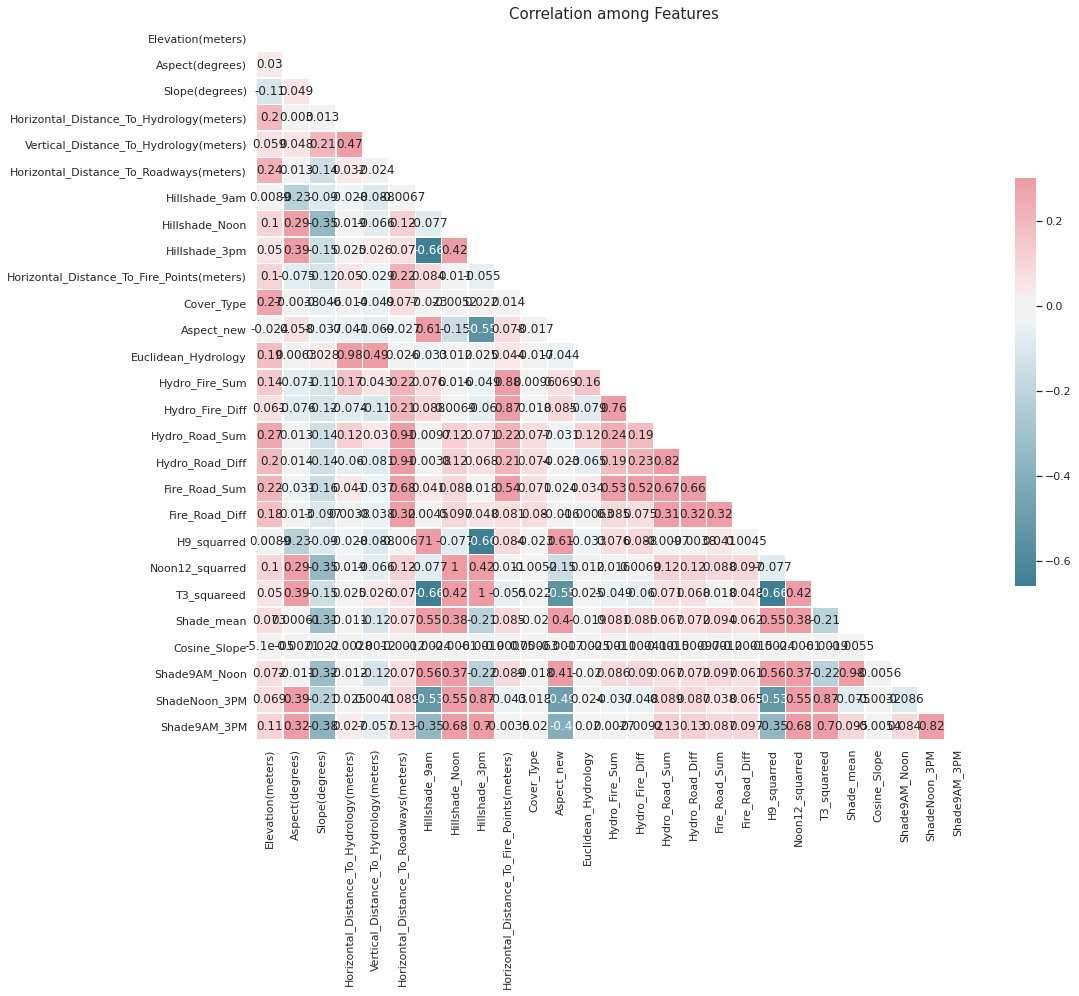

In [264]:
sns.set(style="white")
num_cols = [i for i in df.select_dtypes(include=np.number)]
correlation = df[num_cols].corr(method ='kendall')
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True);
plt.title("Correlation among Features",fontsize=15)
plt.show()

In [265]:
df.corr(method='kendall').unstack().sort_values().drop_duplicates()[:25]

Hillshade_3pm                               Hillshade_9am                             -0.660079
                                            Aspect_new                                -0.547053
Hillshade_9am                               ShadeNoon_3PM                             -0.527133
Aspect_new                                  ShadeNoon_3PM                             -0.493209
Highwater                                   Vertical_Distance_To_Hydrology(meters)    -0.416810
Aspect_new                                  Shade9AM_3PM                              -0.398269
Slope(degrees)                              Shade9AM_3PM                              -0.378982
H9_squarred                                 Shade9AM_3PM                              -0.351375
Noon12_squarred                             Slope(degrees)                            -0.347687
Slope(degrees)                              Shade9AM_Noon                             -0.322899
                                        

# Thus no strong Correlations

In [266]:
df.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),AsceptN_Group,AsceptD_Group,Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Cover_Type,train_or_test,Soil_Type,Wilderness_Area,Aspect_new,Highwater,Euclidean_Hydrology,Hydro_Fire_Sum,Hydro_Fire_Diff,Hydro_Road_Sum,Hydro_Road_Diff,Fire_Road_Sum,Fire_Road_Diff,H9_squarred,Noon12_squarred,T3_squareed,Shade_mean,Cosine_Slope,Soil_Rock_Type,Shade9AM_Noon,ShadeNoon_3PM,Shade9AM_3PM
0,8.000349,186,14,323,66,Q1,Q3,5351,222,249,158,1530,5.0,train,Soil_Type_30,Wilderness_Area_1,6,False,329.674081,1853,1207,5674,5028,6881,3821,49284,62001,24964,235.5,0.136737,Rubble,55278,39342,35076
1,7.982416,243,15,335,33,Q1,Q3,5778,189,251,198,6429,7.0,train,Soil_Type_29,Wilderness_Area_1,63,False,336.621449,6764,6094,6113,5443,12207,651,35721,63001,39204,220.0,-0.759688,Extremely_Stony,47439,49698,37422
2,8.023225,162,12,1224,253,Q4,Q2,3182,231,243,142,1167,5.0,train,Soil_Type_34,Wilderness_Area_3,342,False,1249.873994,2391,57,4406,1958,4349,2015,53361,59049,20164,237.0,0.843854,Extremely_Stony,56133,34506,32802
3,8.035926,345,17,362,92,Q2,Q4,2460,184,211,164,2384,7.0,train,Soil_Type_24,Wilderness_Area_3,165,False,373.507697,2746,2022,2822,2098,4844,76,33856,44521,26896,197.5,-0.275163,Extremely_Stony,38824,34604,30176
4,8.014005,4,9,234,51,Q3,Q1,4994,208,222,151,3813,7.0,train,Soil_Type_29,Wilderness_Area_1,184,False,239.493215,4047,3579,5228,4760,8807,1181,43264,49284,22801,215.0,-0.911130,Extremely_Stony,46176,33522,31408


In [267]:
df.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)', 'AsceptN_Group',
       'AsceptD_Group', 'Horizontal_Distance_To_Roadways(meters)',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Cover_Type',
       'train_or_test', 'Soil_Type', 'Wilderness_Area', 'Aspect_new',
       'Highwater', 'Euclidean_Hydrology', 'Hydro_Fire_Sum', 'Hydro_Fire_Diff',
       'Hydro_Road_Sum', 'Hydro_Road_Diff', 'Fire_Road_Sum', 'Fire_Road_Diff',
       'H9_squarred', 'Noon12_squarred', 'T3_squareed', 'Shade_mean',
       'Cosine_Slope', 'Soil_Rock_Type', 'Shade9AM_Noon', 'ShadeNoon_3PM',
       'Shade9AM_3PM'],
      dtype='object')

# Encoding the features

In [268]:
df[["Highwater"]] *= 1

#### **Using  frequency encoding (To improve the accuracy score),For high cardinality column used category encoding(done ahead) but here we have low cardinality hence used one hot encoding.**

In [269]:
fe_pol = (df.groupby('Soil_Type').size()) / len(df)
df['Soil_Type_fe'] = df['Soil_Type'].apply(lambda x : fe_pol[x])

In [270]:
fe_pol = (df.groupby('Soil_Rock_Type').size()) / len(df)
df['Soil_Rock_Type_fe'] = df['Soil_Rock_Type'].apply(lambda x : fe_pol[x])

In [271]:
fe_pol = (df.groupby('Wilderness_Area').size()) / len(df)
df['Wilderness_Area_fe'] = df['Wilderness_Area'].apply(lambda x : fe_pol[x])

In [272]:
cat_cols = ["AsceptN_Group","AsceptD_Group", "Soil_Rock_Type","Wilderness_Area"]
df= pd.get_dummies(df, columns=cat_cols)

# Train Test Split Normalizing the data

In [273]:
#differentiate Train and test
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [274]:
target_map = {1:0, 2:1, 3:2,4:3 ,5:4 ,6:5 ,7:6}
target_map_inverse = {0:1, 1:2, 2:3 , 3:4, 4:5, 5:6 ,6:7}
train["Cover_Type"] = train["Cover_Type"].map(target_map)

In [275]:
train.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Cover_Type,Soil_Type,Aspect_new,Highwater,Euclidean_Hydrology,Hydro_Fire_Sum,Hydro_Fire_Diff,Hydro_Road_Sum,Hydro_Road_Diff,Fire_Road_Sum,Fire_Road_Diff,H9_squarred,Noon12_squarred,T3_squareed,Shade_mean,Cosine_Slope,Shade9AM_Noon,ShadeNoon_3PM,Shade9AM_3PM,Soil_Type_fe,Soil_Rock_Type_fe,Wilderness_Area_fe,AsceptN_Group_Q1,AsceptN_Group_Q2,AsceptN_Group_Q3,AsceptN_Group_Q4,AsceptD_Group_Q1,AsceptD_Group_Q2,AsceptD_Group_Q3,AsceptD_Group_Q4,Soil_Rock_Type_Extremely_Stony,Soil_Rock_Type_Others,Soil_Rock_Type_Rubble,Wilderness_Area_Wilderness_Area_1,Wilderness_Area_Wilderness_Area_2,Wilderness_Area_Wilderness_Area_3
0,8.000349,186,14,323,66,5351,222,249,158,1530,4,Soil_Type_30,6,0,329.674081,1853,1207,5674,5028,6881,3821,49284,62001,24964,235.5,0.136737,55278,39342,35076,0.051927,0.051927,0.512492,1,0,0,0,0,0,1,0,0,0,1,1,0,0
1,7.982416,243,15,335,33,5778,189,251,198,6429,6,Soil_Type_29,63,0,336.621449,6764,6094,6113,5443,12207,651,35721,63001,39204,220.0,-0.759688,47439,49698,37422,0.198356,0.751370,0.512492,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2,8.023225,162,12,1224,253,3182,231,243,142,1167,4,Soil_Type_34,342,0,1249.873994,2391,57,4406,1958,4349,2015,53361,59049,20164,237.0,0.843854,56133,34506,32802,0.002773,0.751370,0.436074,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,8.035926,345,17,362,92,2460,184,211,164,2384,6,Soil_Type_24,165,0,373.507697,2746,2022,2822,2098,4844,76,33856,44521,26896,197.5,-0.275163,38824,34604,30176,0.036622,0.751370,0.436074,0,1,0,0,0,0,0,1,1,0,0,0,0,1
4,8.014005,4,9,234,51,4994,208,222,151,3813,6,Soil_Type_29,184,0,239.493215,4047,3579,5228,4760,8807,1181,43264,49284,22801,215.0,-0.911130,46176,33522,31408,0.198356,0.751370,0.512492,0,0,1,0,1,0,0,0,1,0,0,1,0,0


In [276]:
test.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Cover_Type,Soil_Type,Aspect_new,Highwater,Euclidean_Hydrology,Hydro_Fire_Sum,Hydro_Fire_Diff,Hydro_Road_Sum,Hydro_Road_Diff,Fire_Road_Sum,Fire_Road_Diff,H9_squarred,Noon12_squarred,T3_squareed,Shade_mean,Cosine_Slope,Shade9AM_Noon,ShadeNoon_3PM,Shade9AM_3PM,Soil_Type_fe,Soil_Rock_Type_fe,Wilderness_Area_fe,AsceptN_Group_Q1,AsceptN_Group_Q2,AsceptN_Group_Q3,AsceptN_Group_Q4,AsceptD_Group_Q1,AsceptD_Group_Q2,AsceptD_Group_Q3,AsceptD_Group_Q4,Soil_Rock_Type_Extremely_Stony,Soil_Rock_Type_Others,Soil_Rock_Type_Rubble,Wilderness_Area_Wilderness_Area_1,Wilderness_Area_Wilderness_Area_2,Wilderness_Area_Wilderness_Area_3
0,7.936660,151,12,60,-5,3373,236,240,132,6083,NaN,Soil_Type_12,331,1,60.207973,6143,6023,3433,3313,9456,2710,55696,57600,17424,238.0,0.843854,56640,31680,31152,0.051584,0.75137,0.512492,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,8.183677,96,34,420,80,2579,250,170,19,3771,NaN,Soil_Type_40,276,0,427.551167,4191,3351,2999,2159,6350,1192,62500,28900,361,210.0,-0.848570,42500,3230,4750,0.015060,0.75137,0.512492,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,7.870548,171,12,270,-52,2764,228,245,147,2008,NaN,Soil_Type_11,351,1,274.961816,2278,1738,3034,2494,4772,756,51984,60025,21609,236.5,0.843854,55860,36015,33516,0.021359,0.75137,0.436074,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,7.971431,155,5,210,14,2437,226,240,149,2455,NaN,Soil_Type_26,335,0,210.466149,2665,2245,2647,2227,4892,18,51076,57600,22201,233.0,0.283662,54240,35760,33674,0.004456,0.75137,0.436074,0,0,0,1,0,1,0,0,1,0,0,0,0,1
4,7.953318,32,12,309,47,2778,217,213,129,42,NaN,Soil_Type_10,212,0,312.553995,351,267,3087,2469,2820,2736,47089,45369,16641,215.0,0.843854,46221,27477,27993,0.056168,0.75137,0.436074,0,0,1,0,1,0,0,0,1,0,0,0,0,1


# K fold Validation

In [277]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
Y = train['Cover_Type']
X = train.iloc[:,train.columns !='Cover_Type']

In [278]:
X.shape

(29050, 45)

In [279]:
Y.shape

(29050,)

# Categorical Encoding for Soil_Type 

In [280]:
from category_encoders.m_estimate import MEstimateEncoder
category_list=['Soil_Type']

In [281]:
encoder_final=MEstimateEncoder()
encoder_final.fit(X[category_list], Y)

cat_enc = encoder_final.transform(X[category_list], Y)
continuous_train = X.drop(columns= category_list)
X = pd.concat([cat_enc,continuous_train],axis=1)

In [282]:
test_enc=encoder_final.transform(test[category_list])
continuous_test=test.drop(columns=category_list)
test=pd.concat([test_enc,continuous_test],axis=1)

In [283]:
# MinMax Scaling
test.drop(['Cover_Type'],axis=1,inplace=True)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
col = []
for features in train.select_dtypes(include=['int64','float64']):
    if features!='Cover_Type':
        col.append(features)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
train[col] = mm.fit_transform(train[col].values)
test[col] = mm.fit_transform(test[col].values)

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import lightgbm as lgb
import xgboost as xgb

In [285]:
from sklearn.metrics import log_loss
from math import sqrt
def log_loss_func(y, y_pred):
    return log_loss(y,y_pred)

In [286]:
#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
import shap

# Hyperparameter Tunning using Bayesian Optimization

In [287]:
%%time
def bayes_parameter_opt_lgb(X, Y, init_round=15, opt_round=25, n_folds=7, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=Y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'metric':'multi_logloss','objective': 'multiclass','num_class': 7}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200,early_stopping_rounds=100)
        return min(cv_result['multi_logloss-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X, Y, init_round=10, opt_round=25, n_folds=7, random_seed=6,n_estimators=10000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.3918   |  0.9895   |  0.2812   |  0.5985   |  49.98    |  24.1     |  20.17    |  35.74    |  74.94    |  0.4615   |
|  2        |  0.4119   |  0.9964   |  0.7939   |  0.9862   |  84.63    |  12.59    |  70.77    |  12.12    |  67.99    |  0.258    |
|  3        |  0.3927   |  0.8192   |  0.8548   |  0.8278   |  56.28    |  26.84    |  54.7     |  45.01    |  62.09    |  0.4252   |
|  4        |  0.4813   |  0.9281   |  0.5869   |  0.1144   |  87.62    |  23.97    |  60.78    |  32.93    |  25.48    |  0.8056   |
|  5        |  0.4166   |  0.9946   |  0.3264   |  0.6526   |  38.59    |  9.692    |  45.14    |  66.6     |  52.98    |  0.8559   |
|  6        |  0.4598   |  0.8342   |  0.8825   |  0.3083   | 

In [288]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='multiclass'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9806068723127148,
 'feature_fraction': 0.1,
 'learning_rate': 0.01,
 'max_bin': 20,
 'max_depth': 5,
 'min_data_in_leaf': 26,
 'min_sum_hessian_in_leaf': 92.02732470016248,
 'num_leaves': 80,
 'subsample': 1.0,
 'objective': 'multiclass',
 'metric': 'auc',
 'is_unbalance': True,
 'boost_from_average': False}

In [289]:
#based on the above minimization
err1 = []
y_pred_tot_lgbm1 = []

fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1


for train_index, test_index in fold.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[test_index]
    m1 = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=1500, num_leaves=50, max_depth=12,min_data_in_leaf=40,objective='multiclass',
                            min_child_samples=20,learning_rate=0.1, reg_alpha=3, reg_lambda=2)
    m1.fit(x_train, y_train,eval_set=[(x_train,y_train),(x_val, y_val)],early_stopping_rounds=100,verbose=200)
    pred_x1 = m1.predict_proba(x_train)
    pred_y1 = m1.predict_proba(x_val)*1.009
    pred_y = np.clip(pred_y1,0.025,0.975)
    print(i, "err_lgbm: ",  log_loss_func(y_val,pred_y1))
    print(i, " err_train: ",  log_loss_func(y_train,pred_x1))
    print(i, " err_with_clip: ",  log_loss_func(y_val,pred_y))
    err1.append(log_loss_func(y_val,pred_y1))
    pred_test1 = m1.predict_proba(test)
    i = i + 1
    y_pred_tot_lgbm1.append(pred_test1)
sum(err1)/5

Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 0.206788	valid_1's multi_logloss: 0.381544
[400]	training's multi_logloss: 0.137274	valid_1's multi_logloss: 0.355763
[600]	training's multi_logloss: 0.103679	valid_1's multi_logloss: 0.344235
[800]	training's multi_logloss: 0.0835639	valid_1's multi_logloss: 0.339466
[1000]	training's multi_logloss: 0.0710792	valid_1's multi_logloss: 0.33748
[1200]	training's multi_logloss: 0.0637519	valid_1's multi_logloss: 0.336887
Early stopping, best iteration is:
[1238]	training's multi_logloss: 0.0629453	valid_1's multi_logloss: 0.336752
1 err_lgbm:  0.3367451150291088
1  err_train:  0.06294528105814995
1  err_with_clip:  0.4391987924445813
Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 0.204958	valid_1's multi_logloss: 0.389708
[400]	training's multi_logloss: 0.135019	valid_1's multi_logloss: 0.358624
[600]	training's multi_logloss: 0.101891	valid_1's mult

0.3335804913447985

In [290]:
print(err1)

[0.3367451150291088, 0.3365228521095096, 0.32236165875576617, 0.3273790488298731, 0.3448937819997348]


weight correction
log_loss for 0.990:0.344897
log_loss for 0.991:0.344897
log_loss for 0.992:0.344897
log_loss for 0.993:0.344897
log_loss for 0.994:0.344897
log_loss for 0.995:0.344897
log_loss for 0.996:0.344897
log_loss for 0.997:0.344897
log_loss for 0.998:0.344897
log_loss for 0.999:0.344897
log_loss for 1.000:0.344897
log_loss for 1.001:0.344897
log_loss for 1.002:0.344897
log_loss for 1.003:0.344896
log_loss for 1.004:0.344896
log_loss for 1.005:0.344896
log_loss for 1.006:0.344895
log_loss for 1.007:0.344895
log_loss for 1.008:0.344894
log_loss for 1.009:0.344894
Best weight for Score:1.009    0.344894
dtype: float64


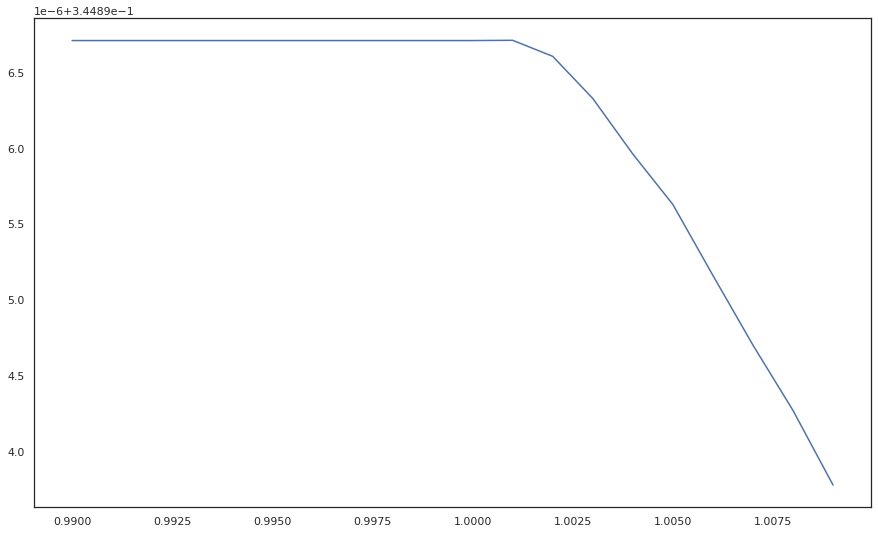

In [291]:
pred_y1 = m1.predict_proba(x_val)
print("weight correction")
W=[(0.990+(i/1000)) for i in range(20)]
S =[]
for w in W:
    error = log_loss_func(y_val, pred_y1*w)
    print('log_loss for {:.3f}:{:.6f}'.format(w,error))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
BS = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(BS))

In [292]:
final_submission.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0
0,0.0,0.0,0.0,0.0,0.9,0.0,0.1
1,0.5,0.0,0.0,0.0,0.0,0.0,0.5
2,0.0,0.0,0.0,0.0,0.8,0.2,0.0
3,0.0,0.0,0.0,0.0,0.8,0.0,0.2
4,0.0,0.0,0.1,0.0,0.7,0.1,0.2


# Final LGBM Model

In [297]:
m = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=1500, num_leaves=50, max_depth=12,min_data_in_leaf=40,objective='multiclass',
                            min_child_samples=20,learning_rate=0.1, reg_alpha=3, reg_lambda=2,random_state=2020)
m.fit(X,Y)
lgbpred=m.predict_proba(test)*1.009
sub = pd.DataFrame(lgbpred,columns=['1','2','3','4','5','6','7'])

In [299]:
sub = np.clip(sub,0.025,0.975)

In [300]:
sub.head()

,1,2,3,4,5,6,7
0,0.025,0.025,0.073252,0.029332,0.037144,0.859487,0.025
1,0.025,0.025,0.071386,0.025000,0.025000,0.891343,0.025
2,0.025,0.025,0.041257,0.025000,0.029079,0.913039,0.025
3,0.025,0.025,0.070943,0.025000,0.025000,0.894065,0.025
4,0.025,0.025,0.032561,0.025000,0.029847,0.920640,0.025


In [ ]:
sub.to_csv(index=False)

# Tried Voting Classifier with XGboost with and without clipping but only gave comparitive results with LGBM, thus sticking to LGBM

In [ ]:
# Ensemble Unigram model (baseline model) 
vclf=VotingClassifier(estimators=[('m',lgb.LGBMClassifier(max_depth=8,num_leaves=127,boosting_type='gbdt',learning_rate=0.02,
                                                          n_estimators=3400,min_data_in_leaf = 95,min_child_weight=5,
                                                          min_child_samples=4,colsample_bytree=0.4,reg_alpha=0.5,reg_lambda=2,
                                                          random_state=2020)),
                                  ('m1',xgb.XGBClassifier(max_depth=30,num_leaves=127,booster ='gbtree',learning_rate=0.02,eta=0.1,subsample=0.8,
                                                          gamma= 1,n_estimators=1000,min_child_weight=5,objective= 'multi:softprob',
                                                          colsample_bytree=0.7,reg_alpha=0.5,random_state=2020))],voting='soft', weights = [0.90, 0.10]) 
vclf.fit(x_train,y_train)
pred_y = vclf.predict_proba(x_val)
pred_clip = np.clip(pred_y,0.025,0.975)                                                             
score = log_loss_func(y_val,pred_y)
score1 = log_loss_func(y_val,pred_clip)
print("No clip score: ",score)
print("Clip score: ",score1)


In [ ]:
#Please reach out if you can get a lesser Log loss using same the feature set, Lets collaborate........

In [ ]:
######################################################  Thank You ############################################################################